In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
import os
import copy
mpl.rcParams['figure.figsize'] = (6, 4)
mpl.rcParams['axes.grid'] = False

In [2]:
# reading the data into data frames using pandas
"""
data_csv is a list of 10 data frames holding a [2,] list for each symboL
the first one (for example data_csv[i][0] ) is the name of the symbol and
the second one (for example data_csv[i][1] ) is the data assosiated to it
"""
data_csv = []
i = 0
for filename in glob.glob('data/*.csv'):
    data_csv.append([filename[5:len(filename)-4],pd.read_csv(filename).drop("<TICKER>",1)])
    i+=1
# print(data_csv[0][0])
# data_csv[0][1].head()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000124EED1DC18>],
      dtype=object)

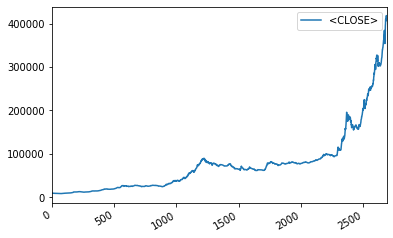

In [3]:
data_frame = 10
features = data_csv[data_frame][1][['<CLOSE>']]
# features.index = data_csv[data_frame][1]['<DTYYYYMMDD>']
# features.head()
features.plot(subplots=True)

In [4]:
def trun_to_windows(input,kernel):
    data = []
    labels = []
    for i in range(0,len(input)-kernel):
        data.append(input[i:i+kernel])
        labels.append(input[i+kernel])
    return np.array(data),np.array(labels).reshape((len(labels),1))

In [5]:
data,labels = trun_to_windows(features.values,20)
data_std = np.std(data)
data_mean = np.mean(data)
labels_std = np.std(labels)
labels_mean = np.mean(labels)
# data_back = copy.deepcopy(data)
# labels_back = copy.deepcopy(labels)

In [6]:
data.shape,labels.shape

((2671, 20, 1), (2671, 1))

In [ ]:
################################################
# from the Models belwo , only one should be run
# the first one , 1 lstm + 1 Dense
# the second one , 2 lstm + 1 Dense
#################################################

In [ ]:
model = keras.Sequential()
model.add(keras.layers.LSTM(20, activation='relu', input_shape=data[0].shape))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mae')
hist = model.fit(data,labels,epochs=20,batch_size=32)

In [14]:
model = keras.Sequential()
model.add(keras.layers.LSTM(20, activation='relu',return_sequences = True, input_shape=data[0].shape))
model.add(keras.layers.LSTM(20, activation='relu'))
model.add(keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mae')
hist = model.fit(data,labels,epochs=20,batch_size=32)

Train on 2671 samples
Epoch 1/20
2671/2671 [==============================] - 5s 2ms/sample - loss: 74852.7203
Epoch 2/20
2671/2671 [==============================] - 3s 947us/sample - loss: 67477.8718
Epoch 3/20
2671/2671 [==============================] - 3s 1ms/sample - loss: 55717.1820
Epoch 4/20
2671/2671 [==============================] - 3s 1ms/sample - loss: 27038.9270
Epoch 5/20
2671/2671 [==============================] - 3s 951us/sample - loss: 1037.6178
Epoch 6/20
2671/2671 [==============================] - 3s 952us/sample - loss: 822.9395
Epoch 7/20
2671/2671 [==============================] - 3s 952us/sample - loss: 817.7716
Epoch 8/20
2671/2671 [==============================] - 3s 953us/sample - loss: 824.7764
Epoch 9/20
2671/2671 [==============================] - 3s 961us/sample - loss: 842.0843
Epoch 10/20
2671/2671 [==============================] - 3s 952us/sample - loss: 845.9051
Epoch 11/20
2671/2671 [==============================] - 3s 963us/sample - loss: 824

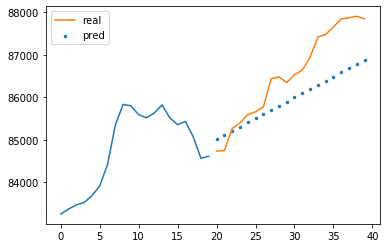

In [15]:
pred = []
i = 2111
gathered_data = list(data[i].reshape((20)))
for j in range(20):
    pred = model.predict(np.float32(np.array(gathered_data[j:j+20]).reshape((1,20,1))))
    gathered_data.append(int(pred[0]))
plt.plot(data[i])
plt.scatter(range(20,40),gathered_data[20:40],s=6,label="pred")
plt.plot(range(20,40),data[20+i],label="real")
plt.legend()